In [1]:
# Disable jedi autocompleter
%config Completer.use_jedi = False

%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy

import seaborn as sns

%matplotlib inline

# combine and analyze

goal: combine the dataframes, and analyze them under a unified framework

2 approaches:

1. start from the csvs
2. start from the raw data (use the analysis tools)

let's start from the csvs, since we have them already!

### first just start with one csv

In [3]:
sample_csv = 'sim_positional_test_v6_constant/results/results.csv'

sample_df = pd.read_csv(sample_csv)
sample_df.head()

,Unnamed: 0,x_noise,y_noise,z_noise,Success,trans_err,quat_dist
0,0,0.00,0.0,0.0,True,0.00,0.0
1,1,0.01,0.0,0.0,True,0.01,0.0
2,2,0.02,0.0,0.0,True,0.02,0.0
3,3,-0.01,0.0,0.0,True,-0.01,0.0
4,4,-0.02,0.0,0.0,True,-0.02,0.0


In [8]:
sample_clone_df = copy.deepcopy(sample_df)

In [40]:
sample_multiple_df = pd.DataFrame().append([sample_df, sample_clone_df, sample_clone_df])
sample_multiple_df

# # typecast the success array
# sample_multiple_df['Success'] = sample_multiple_df['Success'].astype(int)
# sample_multiple_df

# group by x and y noise, and the success value is attributed to the max value
average_success_per_point = sample_multiple_df.groupby(['x_noise', 'y_noise']).agg({'Success': lambda x: np.mean(x)>=0.5})
average_success_per_point

Success
x_noise y_noise         
-0.03   0.025      False
        0.030      False
        0.035      False
-0.02   0.000       True
        0.020       True
        0.025      False
        0.030      False
-0.01   0.000       True
        0.010       True
        0.025       True
 0.00   0.000       True
        0.010       True
        0.020       True
        0.025       True
        0.030      False
        0.035      False
 0.01   0.000       True
        0.010       True
        0.025      False
 0.02   0.000       True
        0.020       True
        0.025      False
        0.030      False
 0.03   0.025      False
        0.030      False
        0.035      False

In [5]:
# draw visualization: x and y noise to success rate
xy_noise_success_plot = sns.scatterplot(data=average_success_per_point, x='x_noise', y='y_noise', hue='Success')
xy_noise_success_plot.set(title='Grasp Success over X and Y noise from ideal object position', xlabel='X Noise (m)',
                          ylabel='Y Noise (m)')

# xy_noise_success_plot.get_figure().savefig(os.path.join(results_dir, 'xy_noise_success' + '.png'))
# xy_noise_success_plot.get_figure().clf()


# next step: draw the rectangles lets goooo
left_rect = [[0, 0], [-0.005, 0], [-0.025, 0.02], [-0.025, 0.0225], [-0.015, 0.0225]]
right_rect = [[0, 0], [0.005, 0], [0.025, 0.02], [0.025, 0.0225], [0.015, 0.0225]]

top_left_box = [[-0.025, 0.0225], [-0.015, 0.0225], [-0.005, 0.0275], [-0.005, 0.035], [-0.025, 0.035]]
top_right_box = [[0.025, 0.0225], [0.015, 0.0225], [0.005, 0.0275], [0.005, 0.035], [0.025, 0.035]]

middle_box = [[-0.005, 0.0275], [0.005, 0.0275], [0.005, 0.035], [-0.005, 0.035]]

left_rect_patch = plt.Polygon(left_rect)
right_rect_patch = plt.Polygon(right_rect)
top_left_rect_patch = plt.Polygon(top_left_box)
top_right_rect_patch = plt.Polygon(top_right_box)
middle_patch = plt.Polygon(middle_box)

xy_noise_success_plot.add_patch(left_rect_patch)
xy_noise_success_plot.add_patch(right_rect_patch)
xy_noise_success_plot.add_patch(top_left_rect_patch)
xy_noise_success_plot.add_patch(top_right_rect_patch)
xy_noise_success_plot.add_patch(middle_patch)

NameError: name 'average_success_per_point' is not defined

In [14]:
already_combined_df = pd.read_csv('icra_real_cube_constant.csv')
already_combined_df

# group by x and y noise, and the success value is attributed to the max value
average_success_per_point = already_combined_df.groupby(['x_noise', 'y_noise']).agg({'Success': lambda x: np.mean(x)>=0.5})
average_success_per_point.head()

Success
x_noise y_noise         
-0.025  0.0250     False
-0.020  0.0150      True
        0.0175      True
        0.0200      True
        0.0250     False

(array([3., 0., 0., 4., 0., 2., 8., 2., 0., 5.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

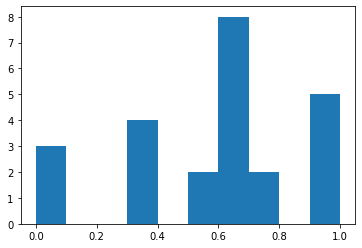

In [18]:
plt.hist(already_combined_df.groupby(['x_noise', 'y_noise']).agg({'Success': lambda x: np.mean(x)})['Success'])

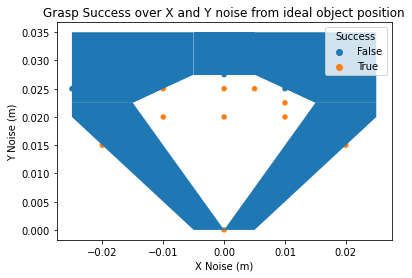

In [59]:
# draw visualization: x and y noise to success rate
xy_noise_success_plot = sns.scatterplot(data=average_success_per_point, x='x_noise', y='y_noise', hue='Success')
xy_noise_success_plot.set(title='Grasp Success over X and Y noise from ideal object position', xlabel='X Noise (m)',
                          ylabel='Y Noise (m)')

# xy_noise_success_plot.get_figure().savefig(os.path.join(results_dir, 'xy_noise_success' + '.png'))
# xy_noise_success_plot.get_figure().clf()


# next step: draw the rectangles lets goooo
# TODO: ADJUST THE PLACE WHERE THESE RECTANGLES ARE DRAWN
left_rect = [[0, 0], [-0.005, 0], [-0.025, 0.02], [-0.025, 0.0225], [-0.015, 0.0225]]
right_rect = [[0, 0], [0.005, 0], [0.025, 0.02], [0.025, 0.0225], [0.015, 0.0225]]

top_left_box = [[-0.025, 0.0225], [-0.015, 0.0225], [-0.005, 0.0275], [-0.005, 0.035], [-0.025, 0.035]]
top_right_box = [[0.025, 0.0225], [0.015, 0.0225], [0.005, 0.0275], [0.005, 0.035], [0.025, 0.035]]

middle_box = [[-0.005, 0.0275], [0.005, 0.0275], [0.005, 0.035], [-0.005, 0.035]]

left_rect_patch = plt.Polygon(left_rect)
right_rect_patch = plt.Polygon(right_rect)
top_left_rect_patch = plt.Polygon(top_left_box)
top_right_rect_patch = plt.Polygon(top_right_box)
middle_patch = plt.Polygon(middle_box)

xy_noise_success_plot.add_patch(left_rect_patch)
xy_noise_success_plot.add_patch(right_rect_patch)
xy_noise_success_plot.add_patch(top_left_rect_patch)
xy_noise_success_plot.add_patch(top_right_rect_patch)
xy_noise_success_plot.add_patch(middle_patch)

# xy_noise_success_plot.colorbar()

## analyzing the timeseries esque data

In [29]:
timeseries_df = pd.read_csv('icra_real_cube_constant_timesteps.csv')
del timeseries_df['Unnamed: 0']
timeseries_df

,experiment_id,timestep,success,x_noise,y_noise,z_noise,roll_noise,pitch_noise,yaw_noise,trans_err,...,obs_18,obs_19,obs_20,obs_21,obs_22,obs_23,obs_24,obs_25,shape,policy
0,0,0,True,0.000,0.00,0.0,0.0,0.0,0.0,0.000,...,3.300262,0.02,0.02,0.105,0.085410,0.084347,0.103099,0.110939,CubeM,constant
1,0,1,True,0.000,0.00,0.0,0.0,0.0,0.0,0.000,...,3.300262,0.02,0.02,0.105,0.085410,0.084347,0.103099,0.110939,CubeM,constant
2,0,2,True,0.000,0.00,0.0,0.0,0.0,0.0,0.000,...,3.300262,0.02,0.02,0.105,0.085410,0.084347,0.103099,0.110939,CubeM,constant
3,0,3,True,0.000,0.00,0.0,0.0,0.0,0.0,0.000,...,3.300262,0.02,0.02,0.105,0.085410,0.084347,0.103099,0.110939,CubeM,constant
4,0,4,True,0.000,0.00,0.0,0.0,0.0,0.0,0.000,...,3.292204,0.02,0.02,0.105,0.086170,0.085075,0.104147,0.111563,CubeM,constant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,75,40,False,0.015,0.02,0.0,0.0,0.0,0.0,0.025,...,3.312668,0.02,0.02,0.105,0.092349,0.069960,0.077872,0.056774,CubeM,constant
3416,75,41,False,0.015,0.02,0.0,0.0,0.0,0.0,0.025,...,3.312668,0.02,0.02,0.105,0.092349,0.069960,0.077872,0.056774,CubeM,constant
3417,75,42,False,0.015,0.02,0.0,0.0,0.0,0.0,0.025,...,3.312668,0.02,0.02,0.105,0.092349,0.069960,0.077872,0.056774,CubeM,constant
3418,75,43,False,0.015,0.02,0.0,0.0,0.0,0.0,0.025,...,3.312668,0.02,0.02,0.105,0.092349,0.069960,0.077872,0.056774,CubeM,constant


In [34]:
timeseries_df[(timeseries_df['x_noise']==0.0) & (timeseries_df['y_noise']==0.0)]

,experiment_id,timestep,success,x_noise,y_noise,z_noise,roll_noise,pitch_noise,yaw_noise,trans_err,...,obs_18,obs_19,obs_20,obs_21,obs_22,obs_23,obs_24,obs_25,shape,policy
0,0,0,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.300262,0.02,0.02,0.105,0.085410,0.084347,0.103099,0.110939,CubeM,constant
1,0,1,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.300262,0.02,0.02,0.105,0.085410,0.084347,0.103099,0.110939,CubeM,constant
2,0,2,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.300262,0.02,0.02,0.105,0.085410,0.084347,0.103099,0.110939,CubeM,constant
3,0,3,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.300262,0.02,0.02,0.105,0.085410,0.084347,0.103099,0.110939,CubeM,constant
4,0,4,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.292204,0.02,0.02,0.105,0.086170,0.085075,0.104147,0.111563,CubeM,constant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,52,40,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.218319,0.02,0.02,0.105,0.079170,0.062900,0.070706,0.055183,CubeM,constant
2381,52,41,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.207357,0.02,0.02,0.105,0.076276,0.059259,0.067467,0.050548,CubeM,constant
2382,52,42,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.218319,0.02,0.02,0.105,0.083700,0.068318,0.076222,0.061939,CubeM,constant
2383,52,43,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.218319,0.02,0.02,0.105,0.083700,0.068318,0.076222,0.061939,CubeM,constant


<AxesSubplot:xlabel='timestep', ylabel='obs_1'>

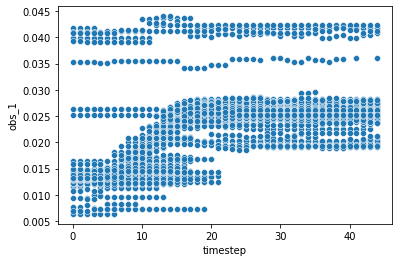

In [31]:
sns.scatterplot(data=timeseries_df, x='timestep', y='obs_1')

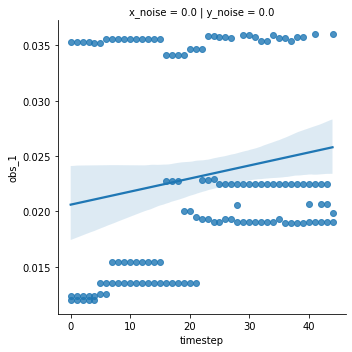

In [55]:
sns.lmplot(data=graphing_df1, x='timestep', y='obs_1', col='y_noise', row='x_noise')

In [54]:
graphing_df1 = timeseries_df[(timeseries_df['x_noise']==0.0) & (timeseries_df['y_noise']==0.0)]

graphing_df = timeseries_df

<AxesSubplot:xlabel='timestep', ylabel='obs_1'>

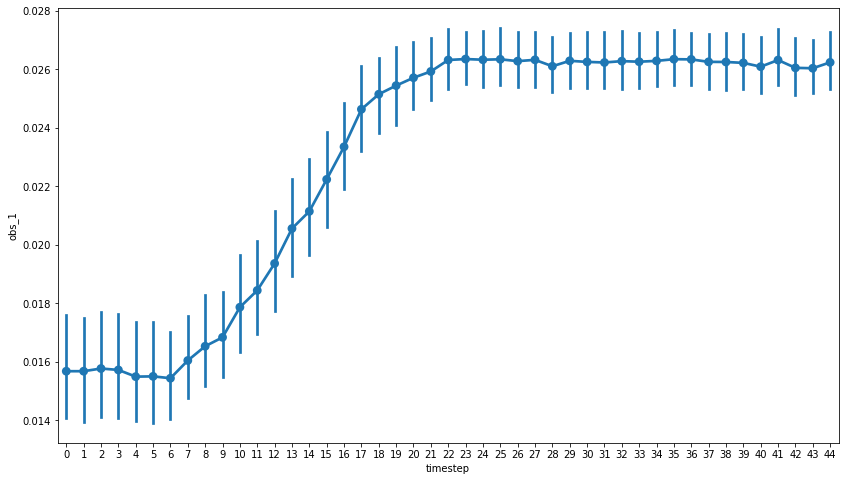

In [47]:
plt.figure(figsize=(14,8))
sns.pointplot(data=graphing_df, x='timestep', y='obs_1')  # 95% ci

<Figure size 1440x1440 with 0 Axes>

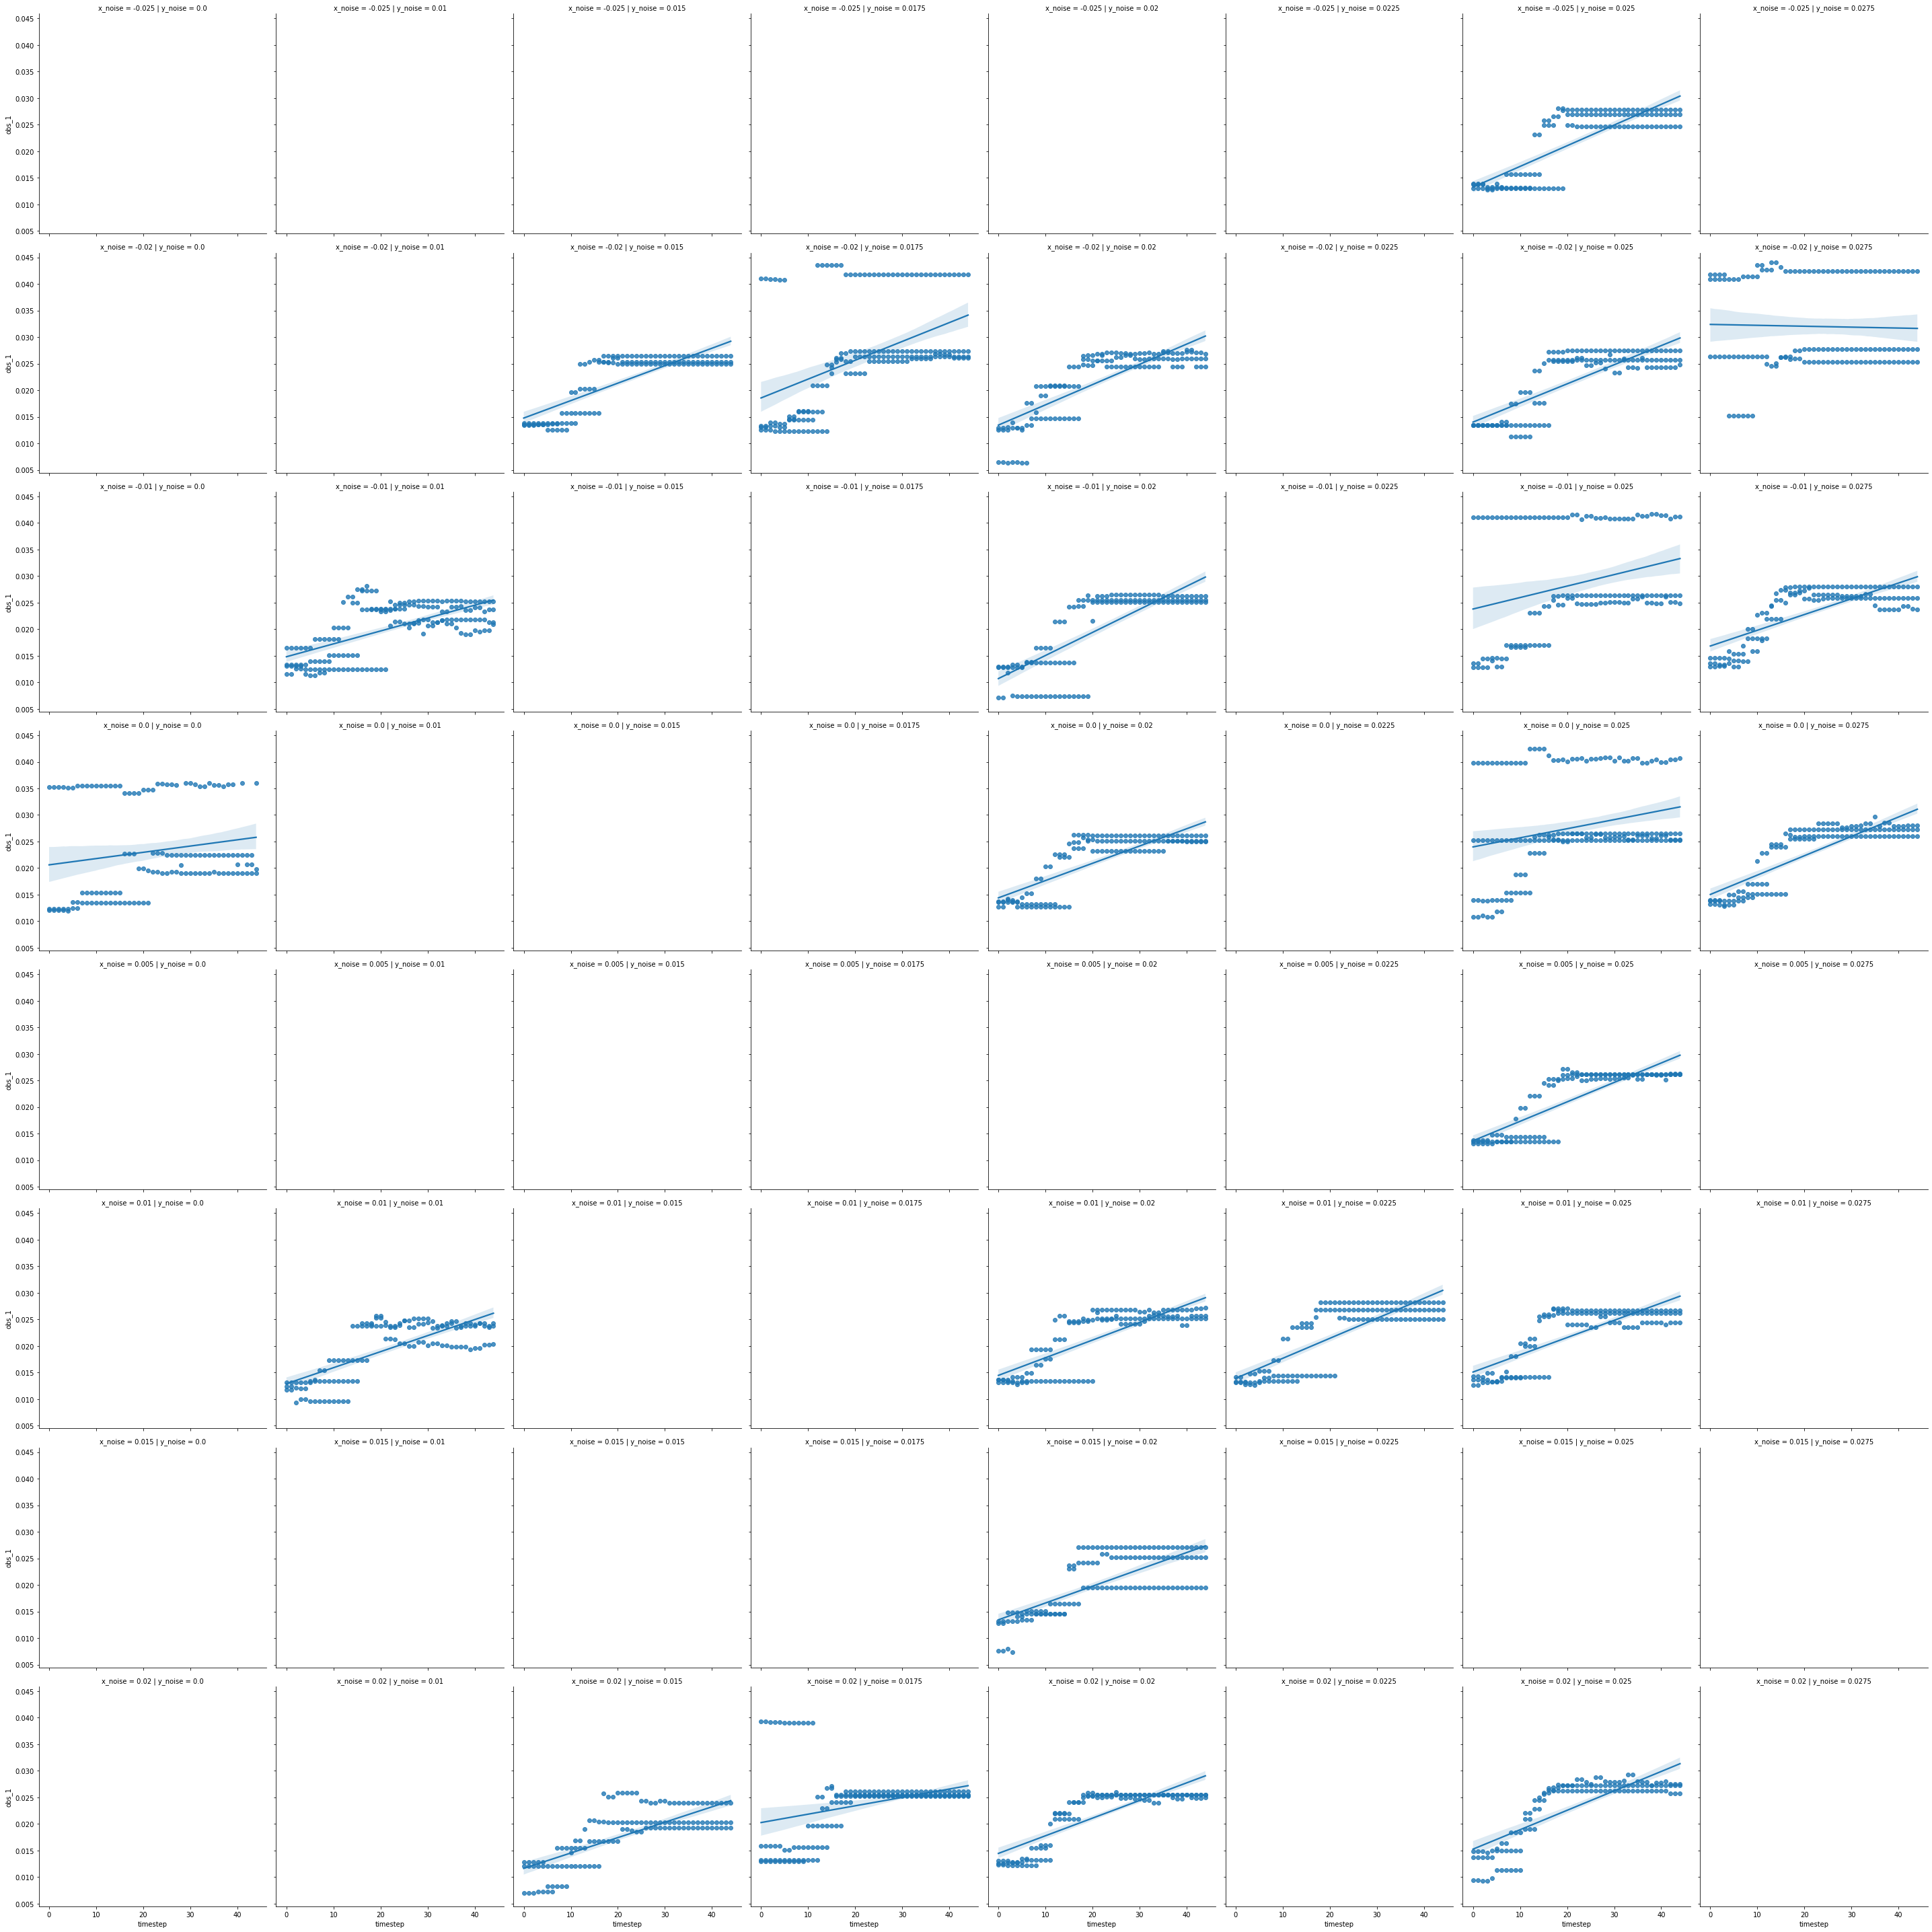

In [53]:
plt.figure(figsize=(20, 20))
sns.lmplot(data=graphing_df, x='timestep', y='obs_1', col='y_noise', row='x_noise')  # 95% ci

### visualization: just the starting timesteps

In [57]:
start_df = timeseries_df[timeseries_df['timestep'] == 0]
start_df

,experiment_id,timestep,success,x_noise,y_noise,z_noise,roll_noise,pitch_noise,yaw_noise,trans_err,...,obs_18,obs_19,obs_20,obs_21,obs_22,obs_23,obs_24,obs_25,shape,policy
0,0,0,True,0.000,0.0000,0.0,0.0,0.0,0.0,0.000000,...,3.300262,0.02,0.02,0.105,0.085410,0.084347,0.103099,0.110939,CubeM,constant
45,1,0,True,-0.010,0.0100,0.0,0.0,0.0,0.0,-0.014142,...,3.289391,0.02,0.02,0.105,0.088589,0.082646,0.109703,0.118495,CubeM,constant
90,2,0,True,0.010,0.0100,0.0,0.0,0.0,0.0,0.014142,...,3.364186,0.02,0.02,0.105,0.093745,0.095197,0.094278,0.099991,CubeM,constant
135,3,0,True,0.020,0.0200,0.0,0.0,0.0,0.0,0.028284,...,3.309584,0.02,0.02,0.105,0.109548,0.109075,0.102392,0.102224,CubeM,constant
180,4,0,False,-0.020,0.0200,0.0,0.0,0.0,0.0,-0.028284,...,3.314393,0.02,0.02,0.105,0.093940,0.084486,0.120236,0.126850,CubeM,constant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,71,0,True,-0.010,0.0275,0.0,0.0,0.0,0.0,-0.029262,...,3.320547,0.02,0.02,0.105,0.106868,0.098952,0.110509,0.110614,CubeM,constant
3240,72,0,False,0.000,0.0275,0.0,0.0,0.0,0.0,0.027500,...,3.274870,0.02,0.02,0.105,0.115385,0.112067,0.111325,0.109934,CubeM,constant
3285,73,0,False,0.010,0.0225,0.0,0.0,0.0,0.0,0.024622,...,3.280278,0.02,0.02,0.105,0.111587,0.111547,0.095035,0.091965,CubeM,constant
3330,74,0,False,0.005,0.0250,0.0,0.0,0.0,0.0,0.025495,...,3.315431,0.02,0.02,0.105,0.115508,0.114319,0.105633,0.103120,CubeM,constant


<AxesSubplot:xlabel='obs_1', ylabel='Count'>

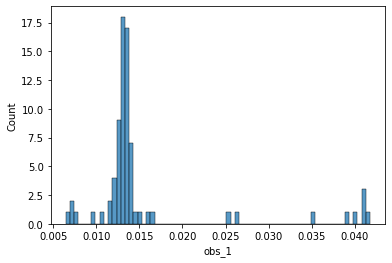

In [58]:
sns.histplot(start_df['obs_1'])

In [ ]:
# mapping from number to name

state_var_names = ['finger1_proximal_x', 'finger1_proximal_y', 'finger1_proximal_z', 'finger1_distal_x', 'finger1_distal_y', 'finger1_distal_z',
                  'finger2_proximal_x', 'finger2_proximal_y', 'finger2_proximal_z', 'finger2_distal_x', 'finger2_distal_y', 'finger2_distal_z',
                  'obj_pos_x', 'obj_pos_y', 'obj_pos_z',
                  'finger1_proximal_angle', 'finger1_distal_angle', 'finger2_proximal_angle', 'finger2_distal_angle',
                  'obj_size_x', 'obj_size_y', 'obj_size_z',
                  'finger_obj_dist_f1_dist_1', ]